# Credit Card Fraud Detection

   Business challenge of this capstone project is to detect potential frauds so that customers are not wrongly charged for items that they did not purchase. We know that credit card fraud has become more & more rampant in recent years. So there is a dire need to improve risk management level in an effective way. This can be achieved by building an accurate & easy credit card risk monitoring system. There are many Machine learning algorithms that can be used for this purpose. The main aim of this project is to build a user model that best identifies fraud cases.

## The project pipeline can be briefly summarized in the following four steps:

    1. Data Understanding: We 1st loaded the data and observed the features present in it
 
    2. Exploratory data analytics (EDA): We performed univariate and bivariate analyses of the data to observe relationship between Amout and Time with class. Dataset is checked for skewness and power tranform is used to mitigate the same, as it might cause problems during the model-building phase.

    3. Train/Test Split: We performed train/test split, to check the performance of our models with unseen data. Here, for validation, you have use the Stratified k-fold cross-validation method. 
 
    5. Model-Building/Hyperparameter Tuning: This is the final step at which we tried different models and fine-tuned their hyperparameters until we g0t the desired level of performance. For hyperparameter tuning, random and grid search are the two popular methods available in scikit-learn in the form of RandomiszedSearchCV and GridSearchCV, respectively.

## <a> 1. Importing the Libraries

In [1]:
import zipfile
# Computational libraries
import numpy as np
import pandas as pd


# Imporitng Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Data Preparation and Modeling Libraries
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.metrics import sensitivity_specificity_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Importing Sampling Library
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Miscellaneous Libraries
from collections import Counter
from numpy import argmax
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## <a> 2. Data understanding

In [2]:
zf = zipfile.ZipFile("310_23498_bundle_archive.zip")
df = pd.read_csv(zf.open("creditcard.csv"))

#Checking the first few rows of the data
print("Few Entries: ")
df.head()

Few Entries: 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Dataset Shape: ", df.shape)
print("Maximum Transaction Value: ", np.max(df.Amount))
print("Minimum Transaction Value: ", np.min(df.Amount))

Dataset Shape:  (284807, 31)
Maximum Transaction Value:  25691.16
Minimum Transaction Value:  0.0


In [4]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#observing the spread of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#checking Null values in the dataset
df.isnull().values.any()

False

<b>There are no missing values in our dataset. Let us now observe the distribution of our classes

## <a> 3. Exploratory Data Analysis

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

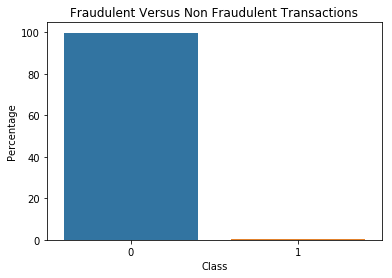

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.title("Fraudulent Versus Non Fraudulent Transactions")
sns.barplot(classes.index,y = [normal_share,fraud_share])
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.show()

<b> We can see that 98% of the transactions are non fraudulent, where as apporx 2% of transactions are fraudulent. Hence we can see that this project has a Data Imbalance problem.

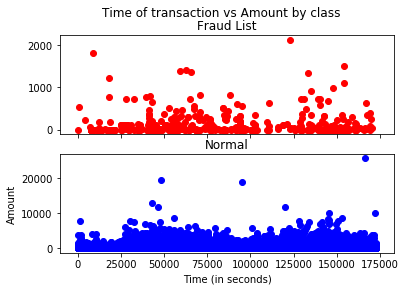

In [9]:
# Create a scatter plot to observe the distribution of classes with time and amount
fraud = df[df.Class == 1]
normal = df[df.Class == 0]
# time vs Amount

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount, color = 'red')
ax1.set_title('Fraud List')

ax2.scatter(normal.Time, normal.Amount, color = 'blue')
ax2.set_title('Normal')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

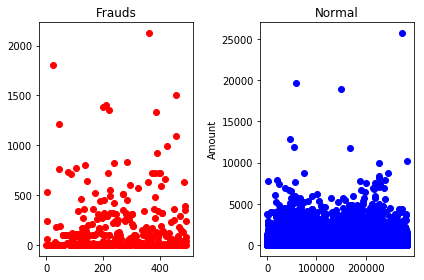

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
#plotting the dataset considering the class
color = {1:'red', 0:'yellow'}

fig,axes = plt.subplots(1,2, figsize = (6,4))
# fig.text('Amount', va = 'centre', rotation = 'vertical')

axes[0].scatter(list(range(1,fraud.shape[0] + 1)), fraud.Amount,color='red')
axes[0].set_title('Frauds')
plt.ylabel("Amount")

axes[1].scatter(list(range(1, normal.shape[0] + 1)), normal.Amount,color='blue')
axes[1].set_title('Normal')
plt.ylabel("Amount")

plt.tight_layout()
plt.show()

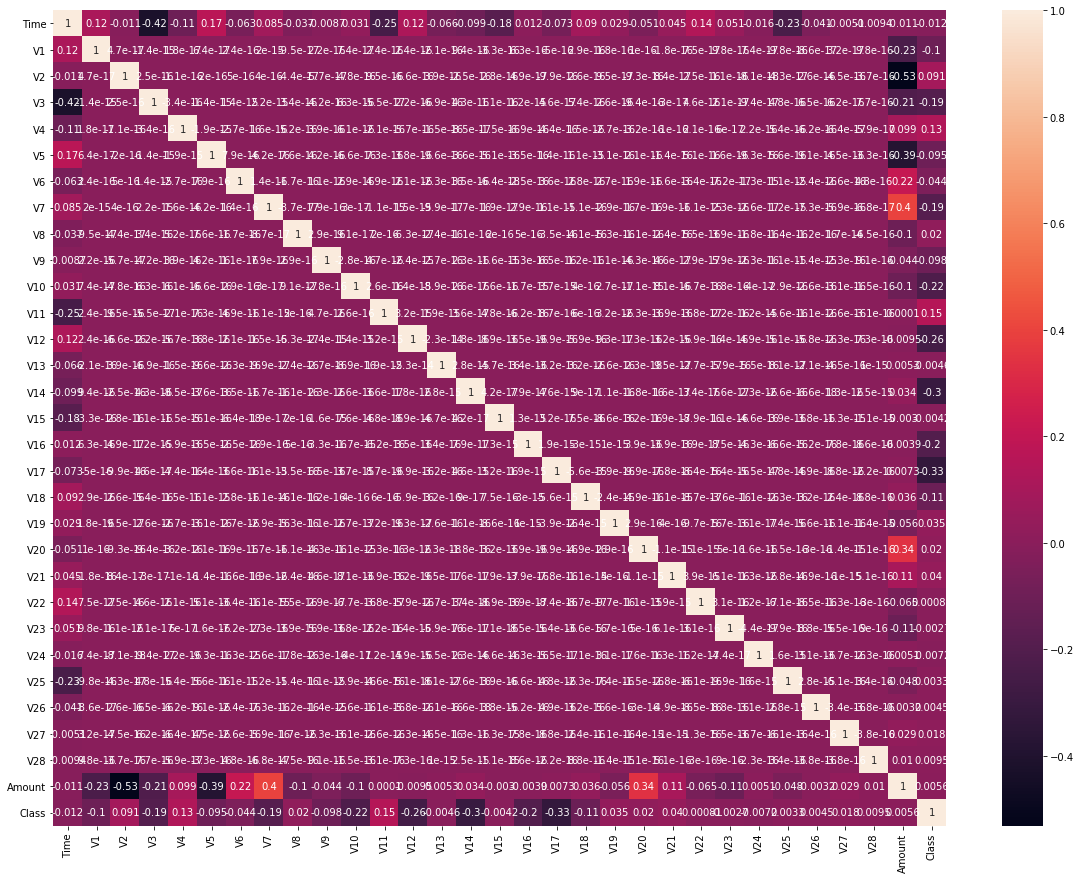

In [11]:
# checking how variables are correlated
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

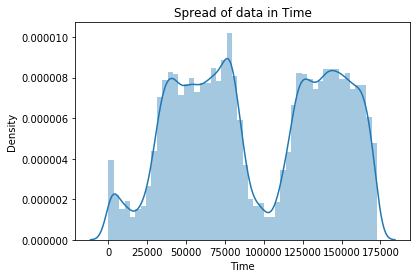

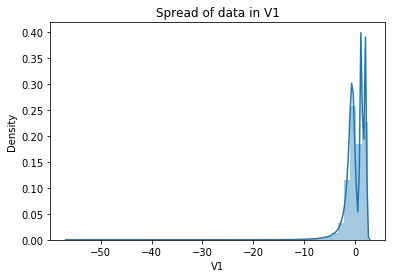

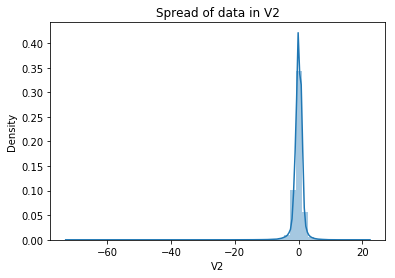

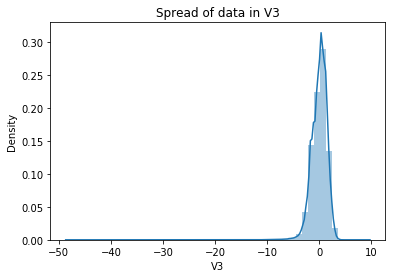

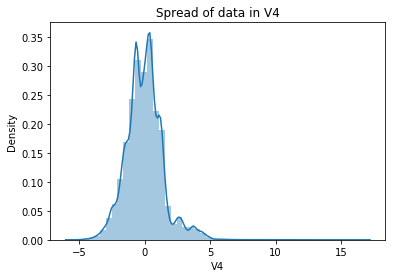

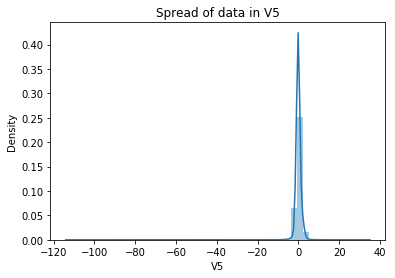

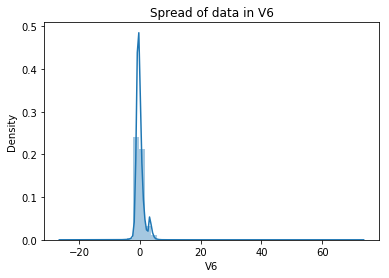

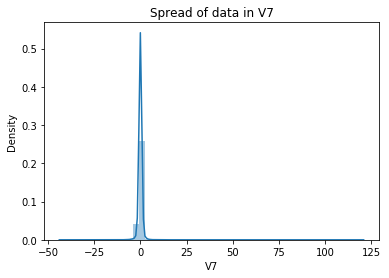

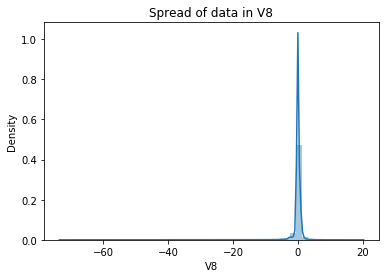

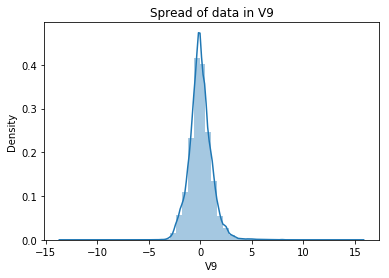

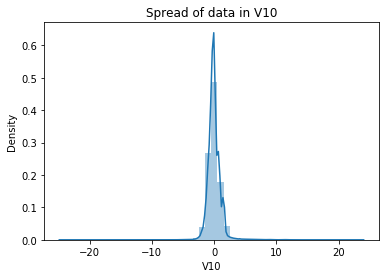

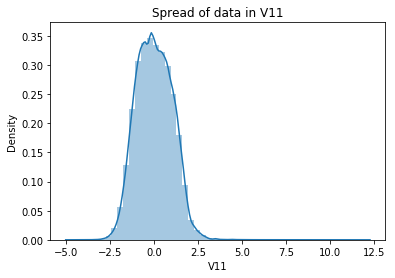

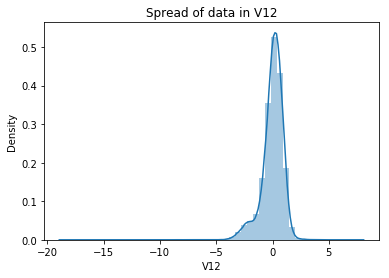

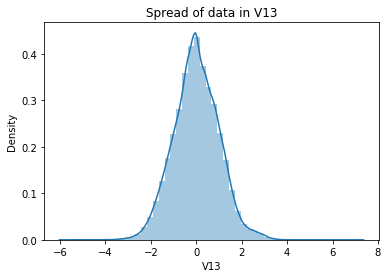

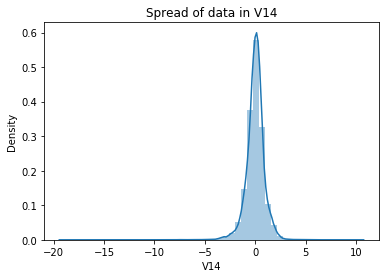

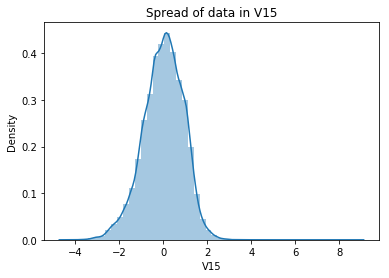

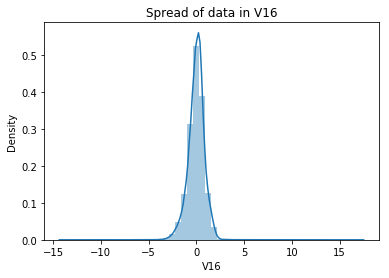

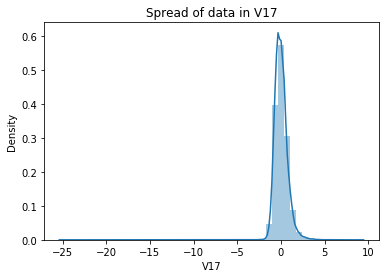

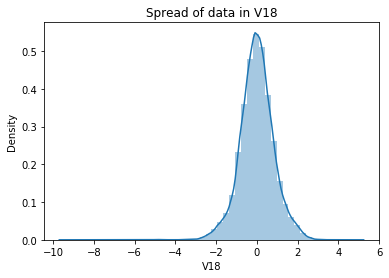

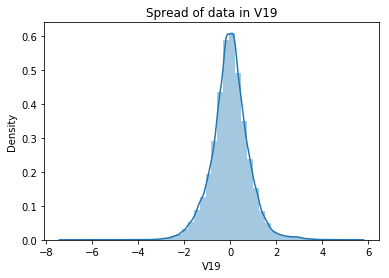

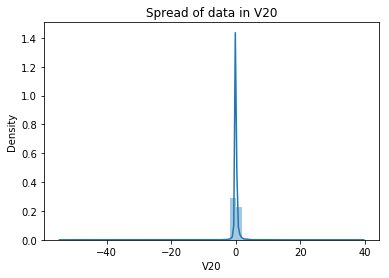

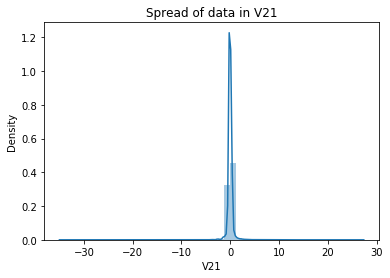

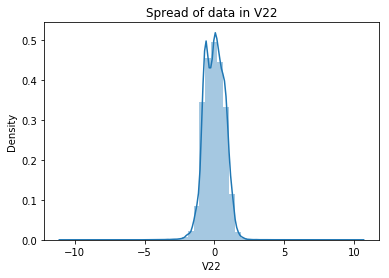

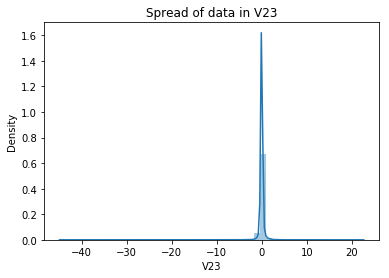

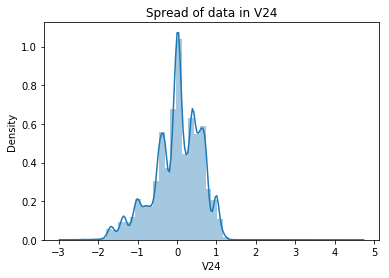

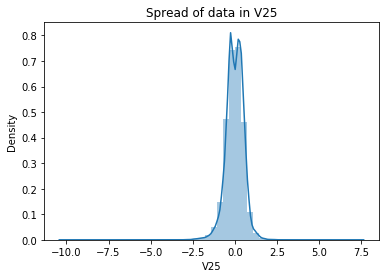

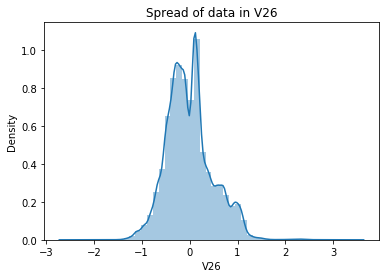

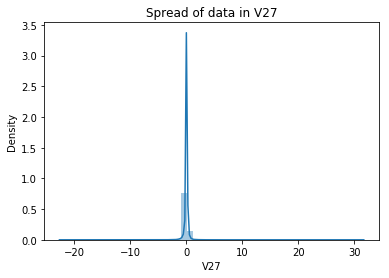

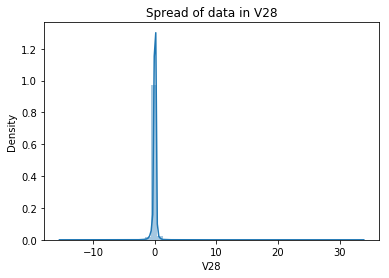

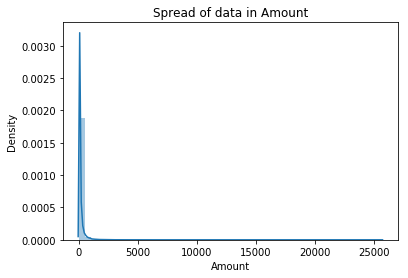

In [12]:
#Lets check how our data is distributed
for i in df.columns:
    if i != 'Class':
        sns.distplot(df[i],kde = True)
        plt.title('Spread of data in'+' '+ i)
        plt.xlabel(i)
        plt.show()

<b> Skewed data can impair the interpretation of our predictive model if we don’t address it correctly. Before building models, let us use Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian

## <a> Data Preparation

In [13]:
#Dropping Time variable as we cannot infer anything from this
df.drop('Time',axis =1, inplace = True)

In [14]:
#splitting the target variable and independent variables
y = df.pop('Class')
X = df

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y,random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


## <a> Scaling Data

In [17]:
sc = StandardScaler()
X_train['Amount'] = sc.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount'] = sc.transform(X_test['Amount'].values.reshape(-1,1))
X_train.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,2.278450e+05
mean,0.000795,-0.000481,-0.000383,-0.000020,0.000175,-0.001171,0.000077,-0.000434,0.000702,-0.000389,-0.000787,0.002718,-0.000493,-0.000059,0.000744,-0.001070,0.000390,0.000056,0.000664,-0.000999,0.000370,0.000303,0.000050,-0.000277,-0.000655,0.000126,-0.000070,0.000154,-4.743622e-16
std,1.958926,1.649092,1.515292,1.415867,1.379569,1.331218,1.238431,1.191482,1.097351,1.086252,1.019200,0.996509,0.994103,0.955993,0.915143,0.874243,0.844235,0.838874,0.813931,0.770806,0.734963,0.725735,0.627419,0.605322,0.521236,0.481939,0.404934,0.326939,1.000002e+00
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-3.516894e-01
25%,-0.919893,-0.598761,-0.891767,-0.847111,-0.692100,-0.768603,-0.553481,-0.207839,-0.640307,-0.535655,-0.761844,-0.401593,-0.648607,-0.425825,-0.582648,-0.469107,-0.483409,-0.499150,-0.455036,-0.211651,-0.228250,-0.542056,-0.161932,-0.354843,-0.316907,-0.326491,-0.070740,-0.052931,-3.291944e-01
50%,0.018692,0.064746,0.179859,-0.021361,-0.054757,-0.274156,0.040420,0.023219,-0.050653,-0.093332,-0.031419,0.142381,-0.014348,0.049571,0.048400,0.065080,-0.065550,-0.003484,0.005351,-0.062606,-0.029280,0.006599,-0.010983,0.040778,0.016081,-0.051623,0.001463,0.011221,-2.639429e-01
75%,1.315616,0.803876,1.026457,0.742281,0.611259,0.397501,0.570530,0.327824,0.598254,0.454469,0.737457,0.620148,0.661868,0.492066,0.649549,0.521521,0.400099,0.500425,0.459782,0.132702,0.186365,0.528282,0.147589,0.438966,0.349880,0.240835,0.091180,0.078118,-4.262209e-02
max,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.572113,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,1.021170e+02


## <a> Performing Data Modeling on Imbalance Dataset

## <a> 4. MODEL BUILDING

Let us Build different models on the imbalanced & balanced dataset and see the result

## `A) IMBALANCED DATASET`

### `MODEL 1 : LOGISTIC REGRESSION`

In [18]:
logistic = LogisticRegression(solver = 'saga', random_state = 42)

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("logistic", logistic)
        ]

# compile pipeline
logis = Pipeline(steps)


# Logistic Regression 
params = {"logistic__penalty": ['l1', 'l2'], 'logistic__C': [0.005,0.006]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

grid_log_reg = RandomizedSearchCV(estimator=logis, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [19]:
grid_log_reg.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt',
                                              PowerTransformer(copy=False)),
                                             ('logistic',
                                              LogisticRegression(random_state=42,
                                                                 solver='saga'))]),
                   n_jobs=-1,
                   param_distributions={'logistic__C': [0.005, 0.006],
                                        'logistic__penalty': ['l1', 'l2']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [20]:
# We automatically get the logistic regression with the best parameters.
grid_log_reg.best_estimator_

Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('logistic',
                 LogisticRegression(C=0.006, random_state=42, solver='saga'))])

In [21]:
# print best hyperparameters
print("Best ROC_AUC: ", grid_log_reg.best_score_)
print("Best hyperparameters: ", grid_log_reg.best_params_)

Best ROC_AUC:  0.9801013588757773
Best hyperparameters:  {'logistic__penalty': 'l2', 'logistic__C': 0.006}


### Optimal Threshold for ROC Curve 

The default value for the threshold is 0.5 for normalized predicted probabilities. Since our dataset is highly imbalanced,the default threshold may not represent an optimal interpretation of the predicted probabilities.

A ROC curve is useful to understand the trade-off in the true-positive rate and false-positive rate for different thresholds. The area under the ROC Curve, so-called ROC AUC, provides a single number to summarize the performance of a model in terms of its ROC Curve with a value between 0.5 (no-skill) and 1.0 (perfect skill). Precision-Recall curve focuses on the minority class, whereas the ROC curve covers both classes. Our dataset is highly imbalanced, so we will choose the threshold achieved from ROC curve as the optimal threshold.

Best Threshold=0.012520


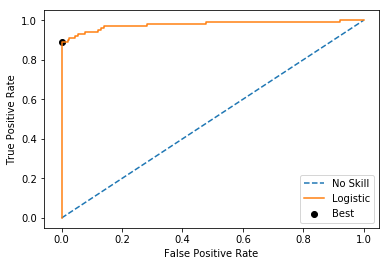

In [22]:
# predict probabilities
y_pred_prob = grid_log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [23]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [24]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(roc_auc_score(y_test, y_class),4)


imbalanced = pd.DataFrame([['Logistic Regression',round(sensitivity,4), round(specificity,4), round(grid_log_reg.best_score_,4),AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imbalanced

[[56754   110]
 [   12    86]]
Sensitivity: 	0.878
Specificity: 	0.998


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.8776,0.9981,0.9801,0.9378


### `MODEL 2 : SVM`

In [25]:
svc = SVC(probability=True,random_state = 42)

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("SVC", svc)
        ]

# compile pipeline
pipe_svc = Pipeline(steps)


# Support Vector Classifier 
params = {'SVC__C': [0.1,0.5], 'SVC__kernel': ['rbf', 'linear']}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

grid_svc = RandomizedSearchCV(estimator=pipe_svc, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [26]:
grid_svc.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 75.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt',
                                              PowerTransformer(copy=False)),
                                             ('SVC',
                                              SVC(probability=True,
                                                  random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'SVC__C': [0.1, 0.5],
                                        'SVC__kernel': ['rbf', 'linear']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [27]:
# We automatically get the logistic regression with the best parameters.
grid_svc.best_estimator_

Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('SVC',
                 SVC(C=0.5, kernel='linear', probability=True,
                     random_state=42))])

In [28]:
# print best hyperparameters
print("Best ROC_AUC: ", grid_svc.best_score_)
print("Best hyperparameters: ", grid_svc.best_params_)

Best ROC_AUC:  0.9690985490218115
Best hyperparameters:  {'SVC__kernel': 'linear', 'SVC__C': 0.5}


### Optimal Threshold for ROC Curve 

Best Threshold=0.000902


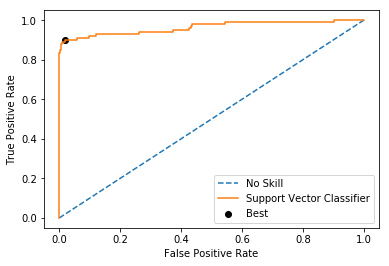

In [29]:
# predict probabilities
y_pred_prob = grid_svc.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Support Vector Classifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [30]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [31]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(roc_auc_score(y_test, y_class),4)

model_results = pd.DataFrame([['SVC',round(sensitivity,4), round(specificity,4), round(grid_svc.best_score_,4),AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imbalanced = imbalanced.append(model_results, ignore_index = True)
imbalanced

[[55849  1015]
 [   11    87]]
Sensitivity: 	0.888
Specificity: 	0.982


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.8776,0.9981,0.9801,0.9378
1,SVC,0.8878,0.9822,0.9691,0.9350


### `MODEL 3 : KNN`

In [32]:
knn = KNeighborsClassifier()

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("KNN", knn)
        ]

# compile pipeline
pipe_svc = Pipeline(steps)


# KNN Classifier 
params = {'KNN__n_neighbors': [21,23,25]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

grid_knn = RandomizedSearchCV(estimator=pipe_svc, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1, random_state = 42)

In [33]:
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 54.1min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt',
                                              PowerTransformer(copy=False)),
                                             ('KNN', KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'KNN__n_neighbors': [21, 23, 25]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [34]:
# We automatically get the logistic regression with the best parameters.
grid_knn.best_estimator_

Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('KNN', KNeighborsClassifier(n_neighbors=21))])

In [35]:
# print best hyperparameters
print("Best ROC_AUC: ", grid_knn.best_score_)
print("Best hyperparameters: ", grid_knn.best_params_)

Best ROC_AUC:  0.9336110708958367
Best hyperparameters:  {'KNN__n_neighbors': 21}


### Optimal Threshold for ROC Curve 

Best Threshold=0.095238


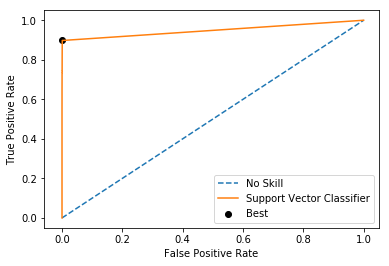

In [36]:
# predict probabilities
y_pred_prob = grid_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Support Vector Classifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [37]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [38]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(roc_auc_score(y_test, y_class),4)

model_results = pd.DataFrame([['KNN',round(sensitivity,4), round(specificity,4), round(grid_knn.best_score_,4),AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imbalanced = imbalanced.append(model_results, ignore_index = True)
imbalanced

[[56828    36]
 [   14    84]]
Sensitivity: 	0.857
Specificity: 	0.999


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.8776,0.9981,0.9801,0.9378
1,SVC,0.8878,0.9822,0.9691,0.9350
2,KNN,0.8571,0.9994,0.9336,0.9283


### `MODEL 4 : DECISION TREE`

In [39]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [4,5],"dtree__min_samples_split": [74,75],
          "dtree__min_samples_leaf": [27,28]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
dtree_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [40]:
# Fit the grid search to the data
dtree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [4, 5],
                                        'dtree__min_samples_leaf': [27, 28],
                                        'dtree__min_samples_split': [74, 75]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [41]:
# We automatically get the logistic regression with the best parameters.
dtree_grid.best_estimator_

Pipeline(steps=[('pt', PowerTransformer()),
                ('dtree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=28,
                                        min_samples_split=74,
                                        random_state=42))])

In [42]:
# print best hyperparameters
print("Best ROC_AUC: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

Best ROC_AUC:  0.9510883641679694
Best hyperparameters:  {'dtree__min_samples_split': 74, 'dtree__min_samples_leaf': 28, 'dtree__max_depth': 5, 'dtree__criterion': 'entropy'}


### Optimal Threshold for ROC Curve 

Best Threshold=0.019608


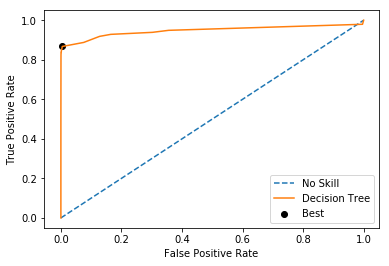

In [43]:
# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [44]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [45]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Decision Tree',round(sensitivity,4), round(specificity,4),round(dtree_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imbalanced = imbalanced.append(model_results, ignore_index = True)
imbalanced


[[56826    38]
 [   16    82]]
Sensitivity: 	0.84
Specificity: 	1.0


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.8776,0.9981,0.9801,0.9378
1,SVC,0.8878,0.9822,0.9691,0.9350
2,KNN,0.8571,0.9994,0.9336,0.9283
3,Decision Tree,0.8367,0.9993,0.9511,0.9180


### `MODEL 5: RANDOM FOREST`

In [46]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('rf', RandomForestClassifier(random_state=42))])

# hyperparameter space
params = {"rf__criterion": ['gini', 'entropy'],"rf__n_estimators": [100,120],
         "rf__min_samples_leaf": [5,10]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,
                             random_state=42 )

In [47]:
# Fit the grid search to the data
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 36.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'rf__criterion': ['gini', 'entropy'],
                                        'rf__min_samples_leaf': [5, 10],
                                        'rf__n_estimators': [100, 120]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [48]:
# We automatically get the logistic regression with the best parameters.
rf_grid.best_estimator_

Pipeline(steps=[('pt', PowerTransformer()),
                ('rf',
                 RandomForestClassifier(min_samples_leaf=10, random_state=42))])

In [49]:
# print best hyperparameters
print("Best ROC_AUC: ", rf_grid.best_score_)
print("Best hyperparameters: ", rf_grid.best_params_)

Best ROC_AUC:  0.9690384575936678
Best hyperparameters:  {'rf__n_estimators': 100, 'rf__min_samples_leaf': 10, 'rf__criterion': 'gini'}


### Optimal Threshold for ROC Curve 

Best Threshold=0.025362


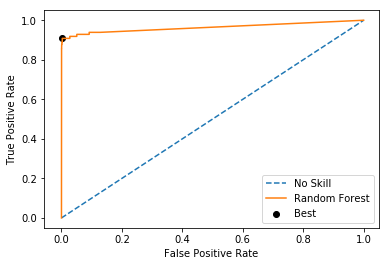

In [50]:
# predict probabilities
y_pred_prob = rf_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()



In [51]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [52]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),3)


model_results = pd.DataFrame([['Random Forest',round(sensitivity,4), round(specificity,4),round(rf_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imbalanced = imbalanced.append(model_results, ignore_index = True)
imbalanced


[[56713   151]
 [   10    88]]
Sensitivity: 	0.9
Specificity: 	1.0


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.8776,0.9981,0.9801,0.9378
1,SVC,0.8878,0.9822,0.9691,0.9350
2,KNN,0.8571,0.9994,0.9336,0.9283
3,Decision Tree,0.8367,0.9993,0.9511,0.9180
4,Random Forest,0.8980,0.9973,0.9690,0.9480


### `MODEL 6: XGBOOST`

In [53]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), 
                 ('xgb', XGBClassifier(n_estimators=120, 
                                       objective='binary:logistic'))])

params = {
        "xgb__gamma": [0.06,0.07],
        "xgb__max_depth": [7,8],
        "xgb__learning_rate": [0.1,0.2],
        }
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

xgb_random = RandomizedSearchCV(estimator = pipe, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, random_state=42 )

In [54]:
# fitting the model
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 32.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate

In [55]:
# We automatically get the logistic regression with the best parameters.
xgb_random.best_estimator_

Pipeline(steps=[('pt', PowerTransformer()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0.06, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=120,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [56]:
# print best hyperparameters
print("Best ROC_AUC: ", xgb_random.best_score_)
print("Best hyperparameters: ", xgb_random.best_params_)

Best ROC_AUC:  0.9812401968855466
Best hyperparameters:  {'xgb__max_depth': 8, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0.06}


### Optimal Threshold for ROC Curve 

Best Threshold=0.000518


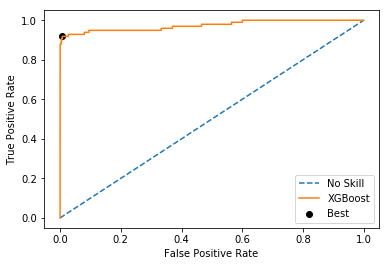

In [57]:
# predict probabilities
y_pred_prob = xgb_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [58]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [59]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),3)


model_results = pd.DataFrame([['XGBoost',round(sensitivity,4), round(specificity,4),round(xgb_random.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imbalanced = imbalanced.append(model_results, ignore_index = True)
imbalanced

[[56448   416]
 [    9    89]]
Sensitivity: 	0.91
Specificity: 	0.99


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logisstic Regression,0.8776,0.9981,0.9801,0.9378
1,SVC,0.8778,0.9822,0.9691,0.9350
2,KNN,0.8571,0.9994,0.9336,0.9283
3,Decision Tree,0.8367,0.9993,0.9511,0.9180
4,Random Forest,0.8980,0.9973,0.9690,0.9480
5,XGBoost,0.9082,0.9927,0.9812,0.9500


_______________________________________

# `B) BALANCED DATASET`

## <a>**1) BALANCING TECHNIQUE 1 : UNIFORM OVERSAMPLING** ##

### `MODEL 1 : LOGISTIC REGRESSION`

In [60]:
logistic = LogisticRegression(random_state = 42, class_weight = 'balanced')

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("logistic", logistic)
        ]

# compile pipeline
logis = Pipeline(steps)


# Logistic Regression 
params = {"logistic__penalty": ['l1', 'l2'], 'logistic__C': [0.006,0.007], 
          "logistic__solver" : ['sag', 'saga']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid_log_reg = RandomizedSearchCV(estimator=logis, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [61]:
grid_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt',
                                              PowerTransformer(copy=False)),
                                             ('logistic',
                                              LogisticRegression(class_weight='balanced',
                                                                 random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'logistic__C': [0.006, 0.007],
                                        'logistic__penalty': ['l1', 'l2'],
                                        'logistic__solver': ['sag', 'saga']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [62]:
# We automatically get the logistic regression with the best parameters.
grid_log_reg.best_estimator_

Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('logistic',
                 LogisticRegression(C=0.007, class_weight='balanced',
                                    random_state=42, solver='saga'))])

In [63]:
# print best hyperparameters
print("Best Roc_AUC: ", grid_log_reg.best_score_)
print("Best hyperparameters: ", grid_log_reg.best_params_)

Best Roc_AUC:  0.9818938863367894
Best hyperparameters:  {'logistic__solver': 'saga', 'logistic__penalty': 'l2', 'logistic__C': 0.007}


### Optimal Threshold for ROC Curve 

Best Threshold=0.511802


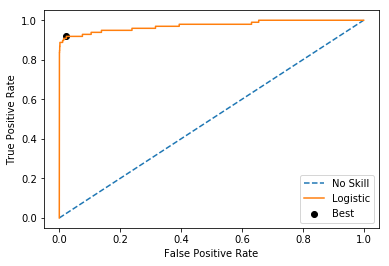

In [64]:
# predict probabilities
y_pred_prob = grid_log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [65]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [66]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)

uni_oversamp = pd.DataFrame([['Logistic Regression',round(sensitivity,4), round(specificity,4),round(grid_log_reg.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
uni_oversamp

[[55542  1322]
 [    9    89]]
Sensitivity: 	0.908
Specificity: 	0.977


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9768,0.9819,0.9425


### `MODEL 2 : DECISION TREE`

In [67]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('dtree', DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [6,7],"dtree__min_samples_split": [70,72],
          "dtree__min_samples_leaf": [23,24]}



# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
dtree_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1, random_state = 42)

In [68]:
# Fit the grid search to the data
dtree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('dtree',
                                              DecisionTreeClassifier(class_weight='balanced',
                                                                     random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [6, 7],
                                        'dtree__min_samples_leaf': [23, 24],
                                        'dtree__min_samples_split': [70, 72]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [69]:
# We automatically get the logistic regression with the best parameters.
dtree_grid.best_estimator_

Pipeline(steps=[('pt', PowerTransformer()),
                ('dtree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=6,
                                        min_samples_leaf=24,
                                        min_samples_split=72,
                                        random_state=42))])

In [70]:
# print best hyperparameters
print("Best Recall: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

Best Recall:  0.9310207467680177
Best hyperparameters:  {'dtree__min_samples_split': 72, 'dtree__min_samples_leaf': 24, 'dtree__max_depth': 6, 'dtree__criterion': 'entropy'}


### Optimal Threshold for ROC Curve 

Best Threshold=0.907858


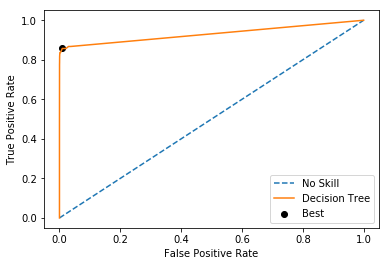

In [71]:
# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [72]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [73]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Decision Tree',round(sensitivity,4), round(specificity,4),round(dtree_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])

uni_oversamp = uni_oversamp.append(model_results, ignore_index = True)
uni_oversamp

[[56667   197]
 [   16    82]]
Sensitivity: 	0.84
Specificity: 	1.0


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9768,0.9819,0.9425
1,Decision Tree,0.8367,0.9965,0.9310,0.9166


### `MODEL 3: RANDOM FOREST`

In [74]:
from sklearn.model_selection import RandomizedSearchCV
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('rf', RandomForestClassifier(random_state=42, class_weight = 'balanced',
                                                                          warm_start = True))])

# hyperparameter space
params = {"rf__criterion": ['gini', 'entropy'],"rf__n_estimators": [100,110],
         "rf__min_samples_leaf": [8,10]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create Randomsearch object
rf_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,
                             random_state=42 )

In [75]:
# Fit the grid search to the data
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 24.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('rf',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     random_state=42,
                                                                     warm_start=True))]),
                   n_jobs=-1,
                   param_distributions={'rf__criterion': ['gini', 'entropy'],
                                        'rf__min_samples_leaf': [8, 10],
                                        'rf__n_estimators': [100, 110]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [76]:
# We automatically get the logistic regression with the best parameters.
rf_grid.best_estimator_

Pipeline(steps=[('pt', PowerTransformer()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy',
                                        min_samples_leaf=10, n_estimators=110,
                                        random_state=42, warm_start=True))])

In [77]:
# print best hyperparameters
print("Best Recall: ", rf_grid.best_score_)
print("Best hyperparameters: ", rf_grid.best_params_)

Best Recall:  0.9686992080622376
Best hyperparameters:  {'rf__n_estimators': 110, 'rf__min_samples_leaf': 10, 'rf__criterion': 'entropy'}


### Optimal Threshold for ROC Curve 

Best Threshold=0.035976


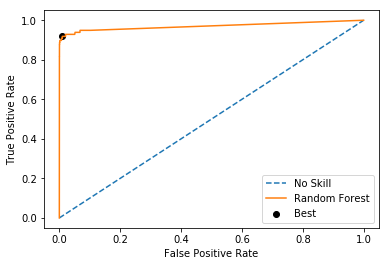

In [78]:
# predict probabilities
y_pred_prob = rf_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [79]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [80]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Random Forest',round(sensitivity,4), round(specificity,4),round(rf_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
uni_oversamp = uni_oversamp.append(model_results, ignore_index = True)
uni_oversamp

[[56310   554]
 [    9    89]]
Sensitivity: 	0.91
Specificity: 	0.99


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9768,0.9819,0.9425
1,Decision Tree,0.8367,0.9965,0.9310,0.9166
2,Random Forest,0.9082,0.9903,0.9687,0.9492


### `MODEL 4: XGBOOST`

In [81]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), 
                 ('xgb', XGBClassifier(n_estimators=120, 
                                       objective='binary:logistic', warm_start = True, class_weight='balanced'))])

params = {
        "xgb__gamma": [0.06,0.07],
        "xgb__max_depth": [7,8],
        "xgb__learning_rate": [0.1,0.2],
        }
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

xgb_random = RandomizedSearchCV(estimator = pipe, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, 
                                random_state=42 )

In [82]:
# fitting the model
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 32.2min finished


[10:51:46] WARNING: ../src/learner.cc:516: 
Parameters: { class_weight, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            class_weight='balanced',
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constr

In [83]:
# We automatically get the logistic regression with the best parameters.
xgb_random.best_estimator_

Pipeline(steps=[('pt', PowerTransformer()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               class_weight='balanced', colsample_bylevel=1,
                               colsample_bynode=1, colsample_bytree=1,
                               gamma=0.06, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=120,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None,
                               warm_start=True))])

In [84]:
# print best hyperparameters
print("Best Recall: ", xgb_random.best_score_)
print("Best hyperparameters: ", xgb_random.best_params_)

Best Recall:  0.9812401968855466
Best hyperparameters:  {'xgb__max_depth': 8, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0.06}


### Optimal Threshold for ROC Curve 

Best Threshold=0.000518


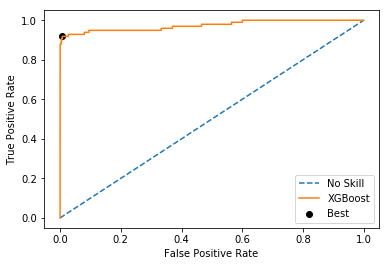

In [85]:
# predict probabilities
y_pred_prob = xgb_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [86]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [87]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['XGBoost',round(sensitivity,4), round(specificity,4),round(xgb_random.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
uni_oversamp = uni_oversamp.append(model_results, ignore_index = True)
uni_oversamp

[[56448   416]
 [    9    89]]
Sensitivity: 	0.91
Specificity: 	0.99


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9768,0.9819,0.9425
1,Decision Tree,0.8367,0.9965,0.9310,0.9166
2,Random Forest,0.9082,0.9903,0.9687,0.9492
3,XGBoost,0.9082,0.9927,0.9812,0.9504


___________________________

## <a>**2) BALANCING TECHNIQUE 2 : RANDOM OVERSAMPLING** ##

In this technique we over-sample the minority class by picking samples at random with replacement.

In [88]:
print('Original dataset shape: ')
print(y_train.value_counts())
print('\n')

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape: ')
print(y_ros.value_counts())


Original dataset shape: 
0    227451
1       394
Name: Class, dtype: int64


Resampled dataset shape: 
1    227451
0    227451
Name: Class, dtype: int64


In [89]:
print('Original dataset shape: ')
pd.crosstab(y_train, columns='count')

Original dataset shape: 


col_0,count
Class,
0,227451
1,394


In [90]:
print('Resampled dataset shape: ')
#Checking the class (percentage) distribution of the target after Random oversampling
pd.crosstab(y_ros, columns='count')

Resampled dataset shape: 


col_0,count
Class,
0,227451
1,227451


##### **key observation:** From above we can see that after performing random over-sampling, the `minority class 1` has been over-sampled by picking samples at arandom with replacement.

### `MODEL 1 : LOGISTIC REGRESSION`

In [91]:
logistic = LogisticRegression(random_state = 42)

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("logistic", logistic)
        ]

# compile pipeline
logis = Pipeline(steps)


# Logistic Regression 
params = {"logistic__penalty": ['l1', 'l2'], 'logistic__C': [0.006,0.007], 
          "logistic__solver" : ['sag', 'saga']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid_log_reg = RandomizedSearchCV(estimator=logis, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [92]:
grid_log_reg.fit(X_ros, y_ros)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  8.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt',
                                              PowerTransformer(copy=False)),
                                             ('logistic',
                                              LogisticRegression(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'logistic__C': [0.006, 0.007],
                                        'logistic__penalty': ['l1', 'l2'],
                                        'logistic__solver': ['sag', 'saga']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [93]:
# We automatically get the logistic regression with the best parameters.
grid_log_reg.best_estimator_

Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('logistic',
                 LogisticRegression(C=0.007, random_state=42, solver='sag'))])

In [94]:
# print best hyperparameters
print("Best ROC_AUC: ", grid_log_reg.best_score_)
print("Best hyperparameters: ", grid_log_reg.best_params_)

Best ROC_AUC:  0.9866829004833754
Best hyperparameters:  {'logistic__solver': 'sag', 'logistic__penalty': 'l2', 'logistic__C': 0.007}


### Optimal Threshold for ROC Curve 

Best Threshold=0.551227


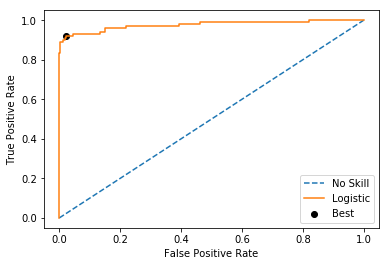

In [95]:
# predict probabilities
y_pred_prob = grid_log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [96]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [97]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)

rand_oversamp = pd.DataFrame([['Logistic Regression',round(sensitivity,4), round(specificity,4),round(grid_log_reg.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
rand_oversamp

[[55564  1300]
 [    9    89]]
Sensitivity: 	0.908
Specificity: 	0.977


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9771,0.9867,0.9427


### `MODEL 2 : DECISION TREE`

In [98]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [3,4],"dtree__min_samples_split": [15,20],
          "dtree__min_samples_leaf": [3000,3500]}



# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
dtree_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [99]:
# Fit the grid search to the data
dtree_grid.fit(X_ros, y_ros)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [3, 4],
                                        'dtree__min_samples_leaf': [3000, 3500],
                                        'dtree__min_samples_split': [15, 20]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [100]:
# We automatically get the logistic regression with the best parameters.
dtree_grid.best_estimator_

Pipeline(steps=[('pt', PowerTransformer()),
                ('dtree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=3000,
                                        min_samples_split=20,
                                        random_state=42))])

In [101]:
# print best hyperparameters
print("Best ROC_AUC: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

Best ROC_AUC:  0.9877994624044814
Best hyperparameters:  {'dtree__min_samples_split': 20, 'dtree__min_samples_leaf': 3000, 'dtree__max_depth': 4, 'dtree__criterion': 'entropy'}


### Optimal Threshold for ROC Curve 

Best Threshold=0.801190


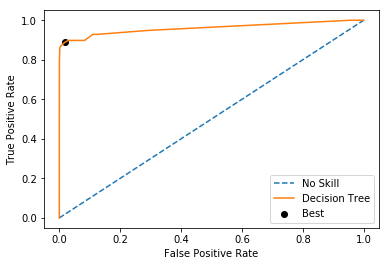

In [102]:
# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [103]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [104]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Decision Tree',round(sensitivity,4), round(specificity,4),round( dtree_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score', 'Test AUC Score'])

rand_oversamp = rand_oversamp.append(model_results, ignore_index = True)
rand_oversamp

[[56660   204]
 [   13    85]]
Sensitivity: 	0.87
Specificity: 	1.0


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9771,0.9867,0.9427
1,Decision Tree,0.8673,0.9964,0.9878,0.9319


### `MODEL 3: RANDOM FOREST`

In [105]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('rf', RandomForestClassifier(random_state=42,
                                                                          warm_start = True))])

# hyperparameter space
params = {"rf__criterion": ['gini', 'entropy'],"rf__n_estimators": [20,30],
         "rf__min_samples_leaf": [500,550]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
rf_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,
                             random_state=42 )

In [106]:
# Fit the grid search to the data
rf_grid.fit(X_ros, y_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  6.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('rf',
                                              RandomForestClassifier(random_state=42,
                                                                     warm_start=True))]),
                   n_jobs=-1,
                   param_distributions={'rf__criterion': ['gini', 'entropy'],
                                        'rf__min_samples_leaf': [500, 550],
                                        'rf__n_estimators': [20, 30]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [107]:
# We automatically get the logistic regression with the best parameters.
rf_grid.best_estimator_

Pipeline(steps=[('pt', PowerTransformer()),
                ('rf',
                 RandomForestClassifier(criterion='entropy',
                                        min_samples_leaf=500, n_estimators=30,
                                        random_state=42, warm_start=True))])

In [108]:
# print best hyperparameters
print("Best ROC_AUC: ", rf_grid.best_score_)
print("Best hyperparameters: ", rf_grid.best_params_)

Best ROC_AUC:  0.9998824991107315
Best hyperparameters:  {'rf__n_estimators': 30, 'rf__min_samples_leaf': 500, 'rf__criterion': 'entropy'}


### Optimal Threshold for ROC Curve 

Best Threshold=0.262478


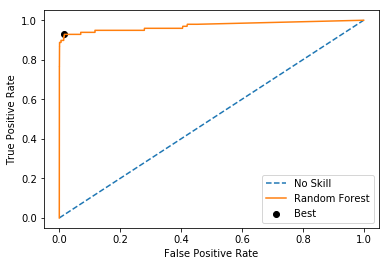

In [109]:
# predict probabilities
y_pred_prob = rf_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [110]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [111]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Random Forest',round(sensitivity,4),round(specificity,4),round(rf_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
rand_oversamp = rand_oversamp.append(model_results, ignore_index = True)
rand_oversamp

[[55929   935]
 [    8    90]]
Sensitivity: 	0.92
Specificity: 	0.98


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9771,0.9867,0.9427
1,Decision Tree,0.8673,0.9964,0.9878,0.9319
2,Random Forest,0.9184,0.9836,0.9999,0.9510


### `MODEL 4: XGBOOST`

In [112]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), 
                 ('xgb', XGBClassifier(n_estimators=120, 
                                       objective='binary:logistic', warm_start = True))])


params = {
        "xgb__gamma": [0.07,0.08],
        "xgb__max_depth": [8,9],
        "xgb__learning_rate": [0.2,0.3],
        }
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

xgb_random = RandomizedSearchCV(estimator = pipe, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, random_state=42 )

# Fitting the model

xgb_random.fit(X_ros, y_ros)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 54.6min finished


[13:40:41] WARNING: ../src/learner.cc:516: 
Parameters: { warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate

In [113]:
# We automatically get the logistic regression with the best parameters.
xgb_random.best_estimator_

Pipeline(steps=[('pt', PowerTransformer()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0.08, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=120,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None,
                               warm_start=True))])

In [114]:
# print best hyperparameters
print("Best ROC_AUC: ", xgb_random.best_score_)
print("Best hyperparameters: ", xgb_random.best_params_)

Best ROC_AUC:  0.9999941269524353
Best hyperparameters:  {'xgb__max_depth': 8, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0.08}


### Optimal Threshold for ROC Curve 

Best Threshold=0.000148


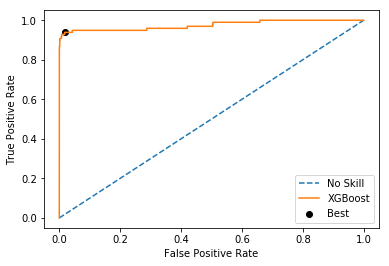

In [115]:
# predict probabilities
y_pred_prob = xgb_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [116]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [117]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['XGBoost',round(sensitivity,4), round(specificity,4),round(xgb_random.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score', 'Test AUC Score'])
rand_oversamp = rand_oversamp.append(model_results, ignore_index = True)
rand_oversamp

[[55849  1015]
 [    7    91]]
Sensitivity: 	0.93
Specificity: 	0.98


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9771,0.9867,0.9427
1,Decision Tree,0.8673,0.9964,0.9878,0.9319
2,Random Forest,0.9184,0.9836,0.9999,0.9510
3,XGBoost,0.9286,0.9822,1.0000,0.9554


___________________________

## <a>**3) BALANCING TECHNIQUE 3 : ADASYN** ##

The essential idea of ADASYN is to use a weighted distribution for different minority class

In [118]:
#Applying Adasyn
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [119]:
print("Imbalance in Original y_train : ")
pd.crosstab( y_train, columns='count')

Imbalance in Original y_train : 


col_0,count
Class,
0,227451
1,394


In [120]:
print("y_train after ADASYN : ")
#Checking the class (percentage) distribution of the target after ADASYN
pd.crosstab( y_train_adasyn, columns='count')


y_train after ADASYN : 


col_0,count
Class,
0,227451
1,227458


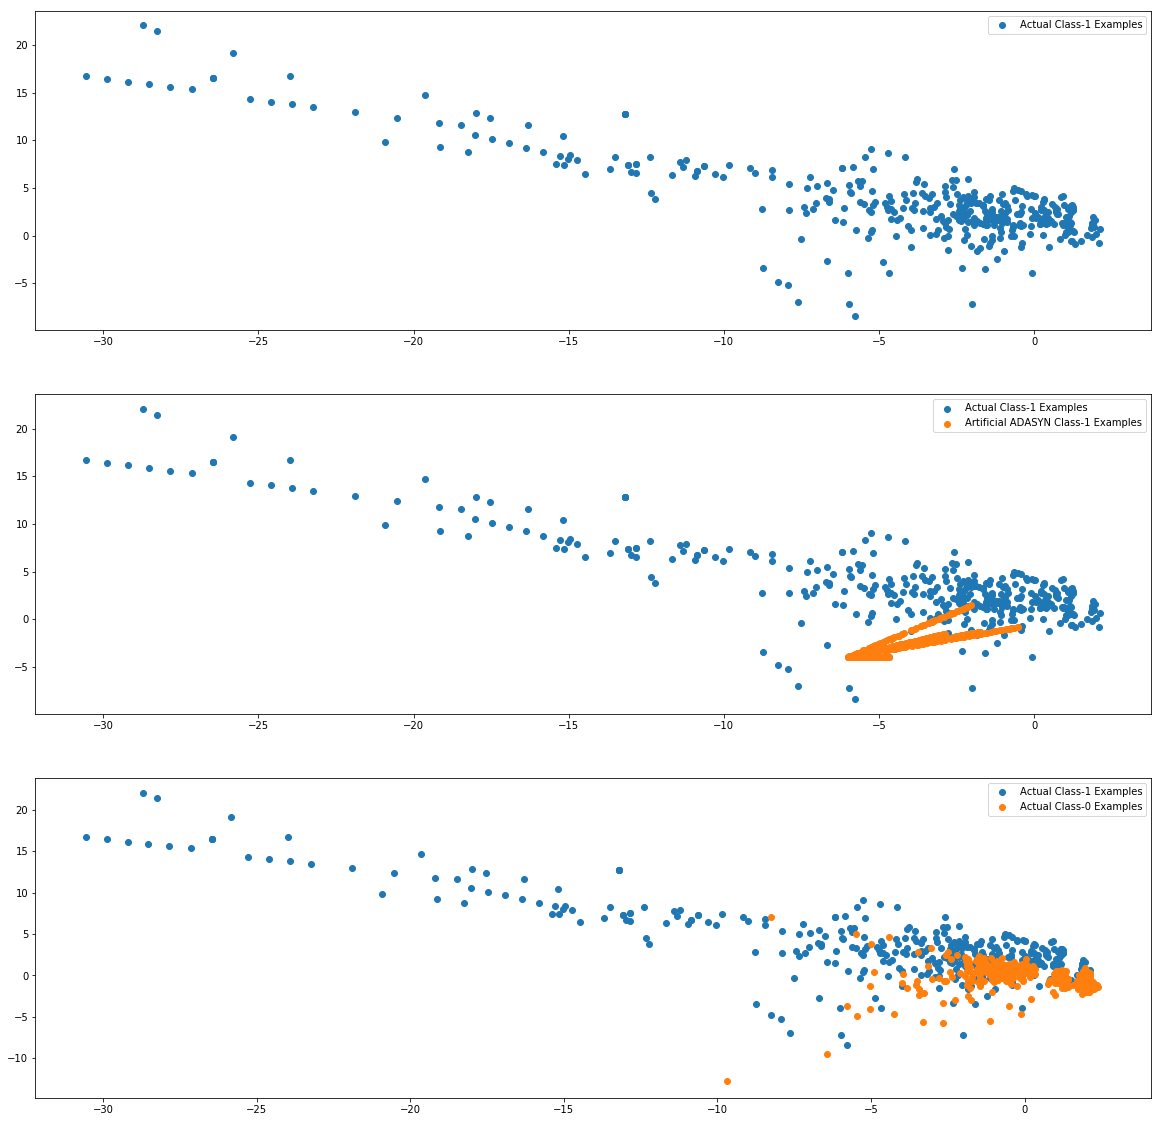

In [121]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [122]:
#observing few values after applying adasyn and scaling
X_train_adasyn.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494
1,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764
2,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693
3,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360
4,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281


In [123]:
#Creating empty DataFrame for holding models information
cols = ['Model Name','Sensitivity','Specificity',' Train AUC Score','Test AUC Score']
models_adasyn = pd.DataFrame(columns = cols)

### `MODEL 1: Logistic Regression`

In [124]:
#Pipeline Processing for powertranformation and Logistic Regression
pipe = Pipeline([('pt',PowerTransformer()), ('logistic', LogisticRegression(random_state = 42))])

#HyperParameters Tuning
#choosing l2 penalty and only the following solvers works with l2 penalty
params = {'logistic__C':np.logspace(0,4,10),'logistic__penalty':['l2'],'logistic__solver':['newton-cg','saga','sag','liblinear']}

#Stratified Kfold
folds = StratifiedKFold(n_splits =5,shuffle = True, random_state = 42)

#Grid Search CV
model_log = RandomizedSearchCV(estimator = pipe,cv = folds, param_distributions = params, scoring = 'roc_auc',n_jobs=-1,verbose=1,random_state = 42 )

In [125]:
#fitting the model
model_log.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('logistic',
                                              LogisticRegression(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'logistic__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                                        'logistic__penalty': ['l2'],
                                        'logistic__solver': ['newton-cg',
                                                             'saga', 'sag',
                                                             'liblinear']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [126]:
# print best hyperparameters
print("Best AUC: ", model_log.best_score_)
print("Best hyperparameters: ", model_log.best_params_)

Best AUC:  0.9681104088228926
Best hyperparameters:  {'logistic__solver': 'newton-cg', 'logistic__penalty': 'l2', 'logistic__C': 59.94842503189409}


In [127]:
y_pred_prob = model_log.predict_proba(X_test)[:, 1]

Best Threshold=0.880398


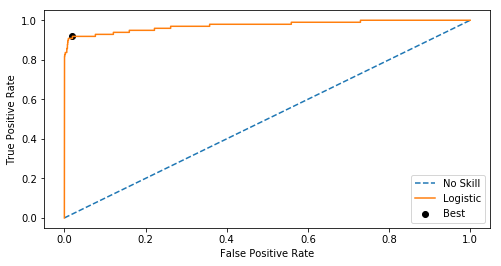

In [128]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [129]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [130]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[55732  1132]
 [    9    89]]
Sensitivity:	 0.91
Specificity:	 0.98
AUC:		  0.94


In [131]:
models_adasyn.loc[-1] = ["Logistic Regression",round(sensitivity,4),round(specificity,4),round(model_log.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9801,0.9681,0.9441


### `MODEL 2: Decision Trees`
- <b> Using pipeline for processing
- <b> Using Powertransform to handle skewness in data.
- <b> Hyper Parameters Tuning
- <b> Cross Validation

In [132]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [5,6],"dtree__min_samples_split": [72,74],
          "dtree__min_samples_leaf": [24,25]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create Randomizedsearch object
model_clf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [133]:
model_clf.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [5, 6],
                                        'dtree__min_samples_leaf': [24, 25],
                                        'dtree__min_samples_split': [72, 74]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [134]:
# print best hyperparameters
print("Best AUC: ", model_clf.best_score_)
print("Best hyperparameters: ", model_clf.best_params_)

Best AUC:  0.9771684899284324
Best hyperparameters:  {'dtree__min_samples_split': 74, 'dtree__min_samples_leaf': 24, 'dtree__max_depth': 6, 'dtree__criterion': 'entropy'}


In [135]:
y_pred_prob = model_clf.predict_proba(X_test)[:, 1]

Best Threshold=0.864172


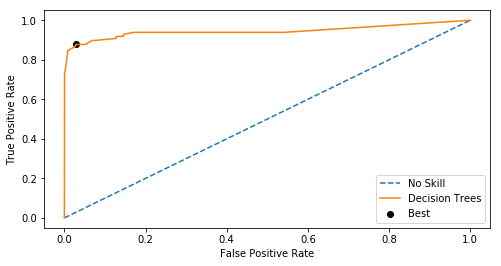

In [136]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Trees')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [137]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [138]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[55335  1529]
 [   13    85]]
Sensitivity: 	0.87
Specificity: 	0.97
AUC:    	 0.94


In [139]:
models_adasyn.loc[-1] = ["Decision Trees",round(sensitivity,4),round(specificity,4),round(model_clf.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Decision Trees,0.8673,0.9731,0.9772,0.9448
1,Logistic Regression,0.9082,0.9801,0.9681,0.9441


### `MODEL 3: Random Forest`
- <b> Using pipeline for processing
- <b> Using Powertransform to handle skewness in data.
- <b> Hyper Parameters Tuning
- <b> Cross Validation

In [140]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('randomforest', RandomForestClassifier(random_state = 42))])

# hyperparameter space
params = [
{'randomforest__n_estimators': [100, 110], 'randomforest__min_samples_leaf': [8, 10], 
 'randomforest__criterion': ["gini", "entropy"]}
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create Randomizedsearch object
model_rf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [141]:
# fit model
model_rf.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 82.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('randomforest',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions=[{'randomforest__criterion': ['gini',
                                                                     'entropy'],
                                         'randomforest__min_samples_leaf': [8,
                                                                            10],
                                         'randomforest__n_estimators': [100,
                                                                        110]}],
                   random_state=42, scoring='roc_auc', verbose=1)

In [142]:
# print best hyperparameters
print("Best AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)

Best AUC:  0.9999980897163503
Best hyperparameters:  {'randomforest__n_estimators': 100, 'randomforest__min_samples_leaf': 8, 'randomforest__criterion': 'entropy'}


In [143]:
y_pred_prob = model_rf.predict_proba(X_test)[:, 1]

Best Threshold=0.106094


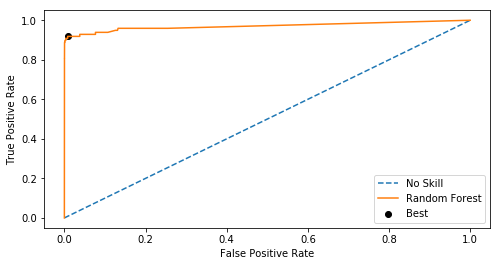

In [144]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [145]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [146]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[56400   464]
 [    9    89]]
Sensitivity: 	0.91
Specificity: 	0.99
AUC:    	 0.97


In [147]:
models_adasyn.loc[-1] = ["Random Forest",round(sensitivity,4),round(specificity,4),round(model_rf.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Random Forest,0.9082,0.9918,1.0000,0.9705
1,Decision Trees,0.8673,0.9731,0.9772,0.9448
2,Logistic Regression,0.9082,0.9801,0.9681,0.9441


### `MODEL 4: XGBOOST`
- <b> Using pipeline for processing
- <b> Using Powertransform to handle skewness in data.
- <b> Hyper Parameters Tuning
- <b> Cross Validation

In [148]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('Xgb', XGBClassifier(objective = 'binary:logistic',n_estimators=120,random_state = 42))])

# hyperparameter space
# hyperparameter space
params = [
{"Xgb__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "Xgb__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "Xgb__min_child_weight" : [ 1, 3, 5, 7 ],
 "Xgb__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "Xgb__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create Randomizedsearch object
model_xgb = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [149]:
# fit model
model_xgb.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 85.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('Xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate

In [150]:
# print best hyperparameters
print("Best AUC: ", model_xgb.best_score_)
print("Best hyperparameters: ", model_xgb.best_params_)

Best AUC:  0.9999901791847169
Best hyperparameters:  {'Xgb__min_child_weight': 1, 'Xgb__max_depth': 15, 'Xgb__learning_rate': 0.15, 'Xgb__gamma': 0.4, 'Xgb__colsample_bytree': 0.3}


In [151]:
y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]

Best Threshold=0.003948


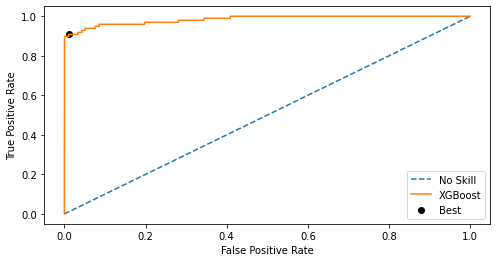

In [152]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [153]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [154]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[56269   595]
 [   10    88]]
Sensitivity: 	0.9
Specificity: 	0.99
AUC:    	 0.98


In [155]:
models_adasyn.loc[-1] = ["XgBoost",round(sensitivity,4),round(specificity,4),round(model_xgb.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XGBoost,0.8980,0.9895,0.9999,0.9843
1,Random Forest,0.9082,0.9918,1.0000,0.9705
2,Decision Trees,0.8673,0.9731,0.9772,0.9448
3,Logistic Regression,0.9082,0.9801,0.9681,0.9441


___________________________

# `BALANCING TECHNIQUE 4 :`

# **SMOTE** ##

In [156]:
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [157]:
print("Imbalance in Original y_train : ")
pd.crosstab( y_train, columns='count')

Imbalance in Original y_train : 


col_0,count
Class,
0,227451
1,394


In [158]:
print("y_train after SMOTE : ")
#Checking the class (percentage) distribution of the target after SMOTE
pd.crosstab( y_train_smote, columns='count')

y_train after SMOTE : 


col_0,count
Class,
0,227451
1,227451


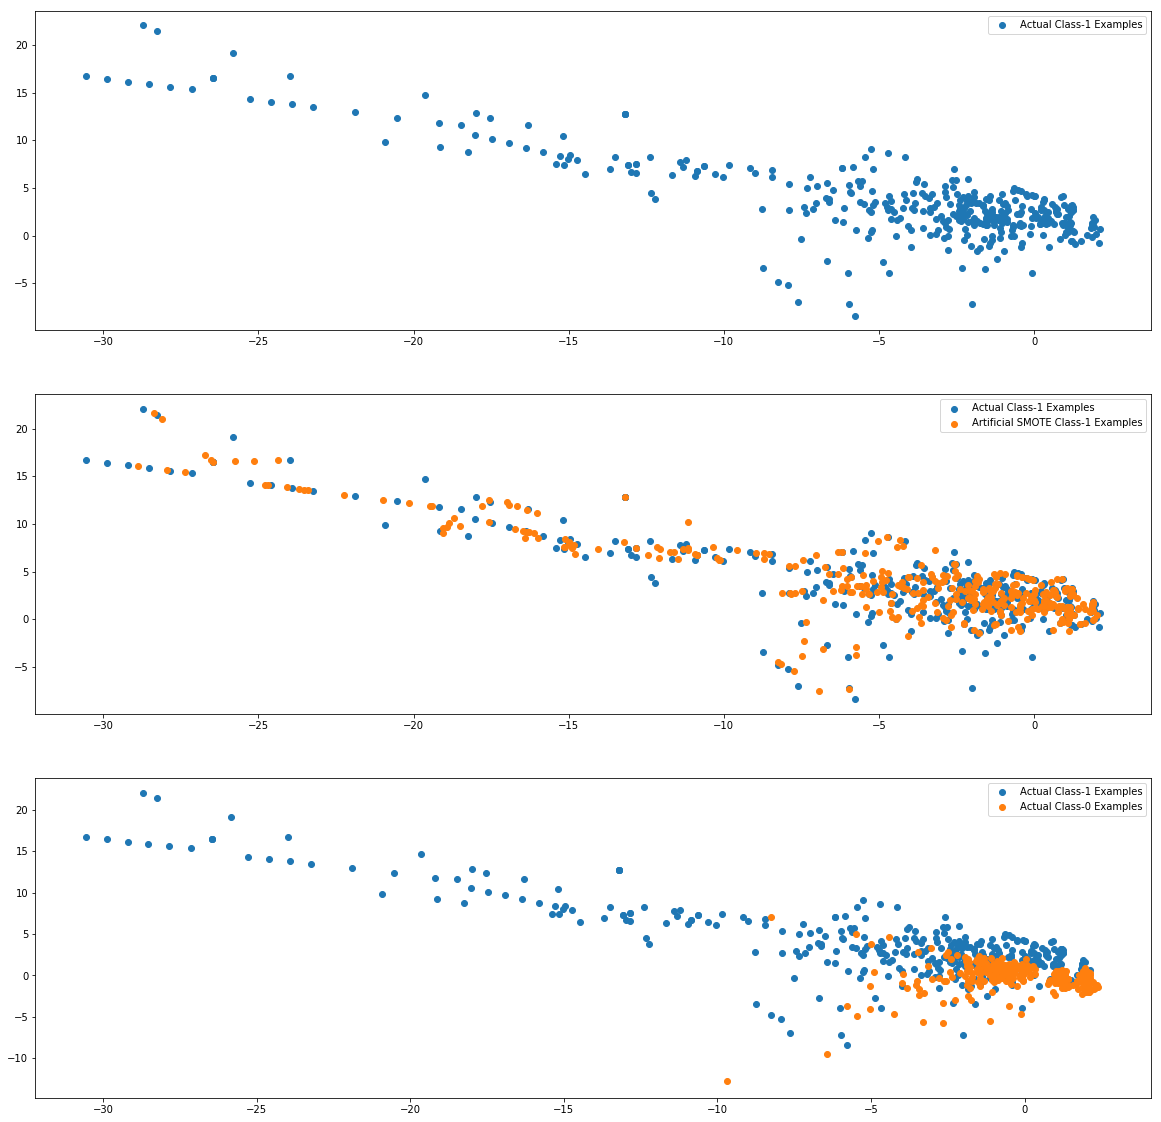

In [159]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [160]:
#observing few values after applying smote and scaling
X_train_smote.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494
1,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764
2,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693
3,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360
4,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281


In [161]:
#Creating empty DataFrame for holding models information
cols = ['Model Name','Sensitivity','Specificity',' Train AUC Score','Test AUC Score']
models_smote = pd.DataFrame(columns = cols)

### `MODEL 1: Logistic Regression`

In [162]:
#Pipeline Processing for powertranformation and Logistic Regression
pipe = Pipeline([('pt',PowerTransformer()), ('logistic', LogisticRegression(random_state = 42))])

#HyperParameters Tuning
params = {'logistic__C':np.logspace(0,4,10),'logistic__penalty':['l1','l2']}

#Stratified Kfold
folds = StratifiedKFold(n_splits =5,shuffle = True, random_state = 42)

#Grid Search CV
model_log = RandomizedSearchCV(estimator = pipe,cv = folds, param_distributions = params, scoring = 'roc_auc',n_jobs=-1,verbose=1,random_state = 42 )

In [163]:
#fitting the model
model_log.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('logistic',
                                              LogisticRegression(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'logistic__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                                        'logistic__penalty': ['l1', 'l2']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [164]:
# print best hyperparameters
print("Best AUC: ", model_log.best_score_)
print("Best hyperparameters: ", model_log.best_params_)

Best AUC:  0.9913766058405249
Best hyperparameters:  {'logistic__penalty': 'l2', 'logistic__C': 3593.813663804626}


In [165]:
y_pred_prob = model_log.predict_proba(X_test)[:, 1]

Best Threshold=0.769369


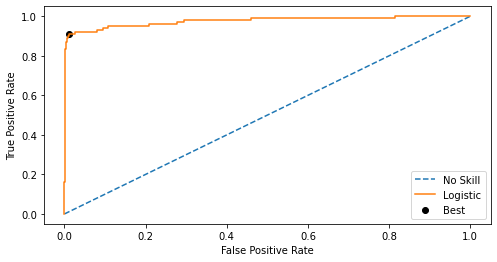

In [166]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [167]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [168]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[56230   634]
 [   10    88]]
Sensitivity: 	0.9
Specificity: 	0.99
AUC:    	 0.94


In [169]:
models_smote.loc[-1] = ["Logistic Regression",round(sensitivity,4),round(specificity,4),round(model_log.best_score_,4),round(auc,4)]
models_smote.index = models_smote.index + 1  # shifting index
models_smote = models_smote.sort_index()  # sorting by index
models_smote

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.898,0.9889,0.9914,0.9434


### `MODEL 2: Decision Trees`
- <b> Using pipeline for processing
- <b> Using Powertransform to handle skewness in data.
- <b> Hyper Parameters Tuning
- <b> Cross Validation

In [170]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [5,6],"dtree__min_samples_split": [72,74],
          "dtree__min_samples_leaf": [24,25]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_clf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [171]:
model_clf.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [5, 6],
                                        'dtree__min_samples_leaf': [24, 25],
                                        'dtree__min_samples_split': [72, 74]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [172]:
# print best hyperparameters
print("Best AUC: ", model_clf.best_score_)
print("Best hyperparameters: ", model_clf.best_params_)

Best AUC:  0.9934525781939543
Best hyperparameters:  {'dtree__min_samples_split': 74, 'dtree__min_samples_leaf': 24, 'dtree__max_depth': 6, 'dtree__criterion': 'entropy'}


In [173]:
y_pred_prob = model_clf.predict_proba(X_test)[:, 1]

Best Threshold=0.862786


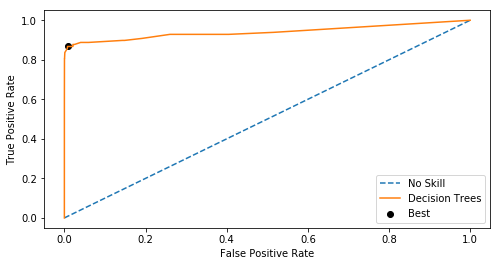

In [174]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Trees')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [175]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [176]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[56452   412]
 [   14    84]]
Sensitivity: 	0.86
Specificity: 	0.99
AUC:    	 0.94


In [177]:
models_smote.loc[-1] = ["Decision Trees",round(sensitivity,4),round(specificity,4),round(model_clf.best_score_,4),round(auc,4)]
models_smote.index = models_smote.index + 1  # shifting index
models_smote = models_smote.sort_index()  # sorting by index
models_smote

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Decision Trees,0.8571,0.9928,0.9935,0.9407
1,Logistic Regression,0.8980,0.9889,0.9914,0.9434


### `MODEL 3: Random Forest`
- <b> Using pipeline for processing
- <b> Using Powertransform to handle skewness in data.
- <b> Hyper Parameters Tuning
- <b> Cross Validation

In [178]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('randomforest', RandomForestClassifier(warm_start = True,random_state = 42))])

# hyperparameter space
params = [
{'randomforest__n_estimators': [100, 110], 'randomforest__min_samples_leaf': [8, 10], 
 'randomforest__criterion': ["gini", "entropy"]}
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_rf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [179]:
# fit model
model_rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 67.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('randomforest',
                                              RandomForestClassifier(random_state=42,
                                                                     warm_start=True))]),
                   n_jobs=-1,
                   param_distributions=[{'randomforest__criterion': ['gini',
                                                                     'entropy'],
                                         'randomforest__min_samples_leaf': [8,
                                                                            10],
                                         'randomforest__n_estimators': [100,
                                                                        110]}],
                   random_state=42, scoring='roc_auc', verbose=1)

In [180]:
# print best hyperparameters
print("Best AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)

Best AUC:  0.9999929953298299
Best hyperparameters:  {'randomforest__n_estimators': 100, 'randomforest__min_samples_leaf': 10, 'randomforest__criterion': 'entropy'}


In [181]:
y_pred_prob = model_rf.predict_proba(X_test)[:, 1]

Best Threshold=0.095187


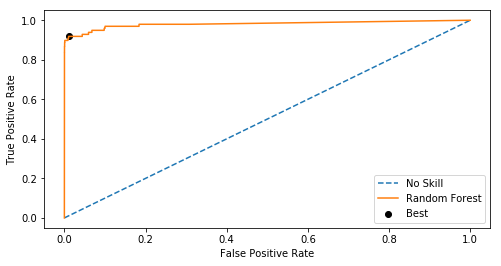

In [182]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [183]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [184]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[56272   592]
 [    9    89]]
Sensitivity: 	0.91
Specificity: 	0.99
AUC:    	 0.98


In [185]:
models_smote.loc[-1] = ["Random Forest",round(sensitivity,4),round(specificity,4),round(model_rf.best_score_,4),round(auc,4)]
models_smote.index = models_smote.index + 1  # shifting index
models_smote = models_smote.sort_index()  # sorting by index
models_smote

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Random Forest,0.9082,0.9896,1.0000,0.9808
1,Decision Trees,0.8571,0.9928,0.9935,0.9407
2,Logistic Regression,0.8980,0.9889,0.9914,0.9434


### `MODEL 4: XGBOOST`
- <b> Using pipeline for processing
- <b> Using Powertransform to handle skewness in data.
- <b> Hyper Parameters Tuning
- <b> Cross Validation

In [186]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('Xgb', XGBClassifier(objective = 'binary:logistic',n_estimators=120,random_state = 42))])

# hyperparameter space
params = [
{"Xgb__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "Xgb__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "Xgb__min_child_weight" : [ 1, 3, 5, 7 ],
 "Xgb__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "Xgb__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_xgb = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [187]:
# fit model
model_xgb.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 46.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 57.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('Xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate

In [188]:
# print best hyperparameters
print("Best AUC: ", model_xgb.best_score_)
print("Best hyperparameters: ", model_xgb.best_params_)

Best AUC:  0.9999916101233011
Best hyperparameters:  {'Xgb__min_child_weight': 1, 'Xgb__max_depth': 15, 'Xgb__learning_rate': 0.15, 'Xgb__gamma': 0.4, 'Xgb__colsample_bytree': 0.3}


In [189]:
y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]

Best Threshold=0.004819


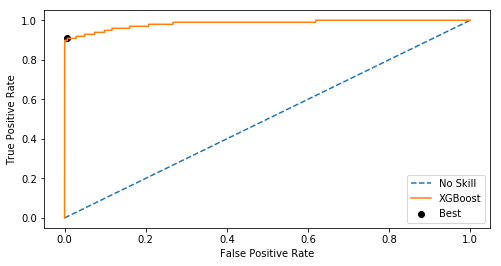

In [190]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [191]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [192]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[56471   393]
 [   10    88]]
Sensitivity: 	0.9
Specificity: 	0.99
AUC:    	 0.98


In [193]:
models_smote.loc[-1] = ["XgBoost",round(sensitivity,4),round(specificity,4),round(model_xgb.best_score_,4),round(auc,4)]
models_smote.index = models_smote.index + 1  # shifting index
models_smote = models_smote.sort_index()  # sorting by index
models_smote

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XGBoost,0.8980,0.9931,1.0000,0.9833
1,Random Forest,0.9082,0.9896,1.0000,0.9808
2,Decision Trees,0.8571,0.9928,0.9935,0.9407
3,Logistic Regression,0.8980,0.9889,0.9914,0.9434


_______________________________

## <a> 4. SUMMARY:

To understand how imbalanced data may impair model interpretation, we have 1st built various ML models on the imbalanced dataset. The dataset is then balanced by adopting various balancing techniques such as random oversampling, uniform oversampling, ADASYN & SMOTE. ML Models are then built on these datasets to observe which model and which balancing technique gives us better result.

In [194]:
print("Results on Imbalanced Dataset:")
imbalanced

Results on Imbalanced Dataset:


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.8776,0.9981,0.9801,0.9378
1,SVC,0.8778,0.9822,0.9691,0.9350
2,KNN,0.8571,0.9994,0.9336,0.9283
3,Decision Tree,0.8367,0.9993,0.9511,0.9180
4,Random Forest,0.8980,0.9973,0.9690,0.9480
5,XGBoost,0.9082,0.9927,0.9812,0.9500


In [195]:
print("Results on dataset balanced by random oversampling technique:")
rand_oversamp

Results on dataset balanced by random oversampling technique:


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9771,0.9867,0.9427
1,Decision Tree,0.8673,0.9964,0.9878,0.9319
2,Random Forest,0.9184,0.9836,0.9999,0.9510
3,XGBoost,0.9286,0.9822,1.0000,0.9554


In [196]:
print("Results on dataset balanced by uniform oversampling technique:")
uni_oversamp

Results on dataset balanced by uniform oversampling technique:


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.9082,0.9768,0.9819,0.9425
1,Decision Tree,0.8367,0.9965,0.9310,0.9166
2,Random Forest,0.9082,0.9903,0.9687,0.9492
3,XGBoost,0.9082,0.9927,0.9812,0.9504


In [197]:
print("Results on dataset balanced by ADASYN technique:")
models_adasyn

Results on dataset balanced by ADASYN technique:


,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XGBoost,0.8980,0.9895,0.9999,0.9843
1,Random Forest,0.9082,0.9918,1.0000,0.9705
2,Decision Trees,0.8673,0.9731,0.9772,0.9448
3,Logistic Regression,0.9082,0.9801,0.9681,0.9441


In [198]:
print("Results on dataset balanced by SMOTE technique:")
models_smote

Results on dataset balanced by SMOTE technique:


,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XGBoost,0.8980,0.9931,1.0000,0.9833
1,Random Forest,0.9082,0.9896,1.0000,0.9808
2,Decision Trees,0.8571,0.9928,0.9935,0.9407
3,Logistic Regression,0.8980,0.9889,0.9914,0.9434


_____________________________________

## <a> 5. FINDING IMPORTANT FEATURES:

### `a.) For the Imbalanced Dataset`

Let us print the Best Imbalance Model to get the important Features:

In [199]:
# perform the best oversampling method on X_train & y_train
clf = XGBClassifier(max_depth= 8, learning_rate = 0.2, gamma = 0.06)  #initialise the model with optimum hyperparameters
clf.fit(X_train,y_train ) # fit on the balanced dataset
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [200]:
threshold = thresholds[np.argmax(tpr-fpr)]
print("Best Threshold",threshold)
y_pred = clf.predict(X_test)
y_class = list(map(lambda x: 1 if x > threshold else 0,y_pred_prob))
print("Test AUC :",round(roc_auc_score(y_test,y_class),4))

Best Threshold 0.0005705313
Test AUC : 0.95


Top var = 17
2nd Top var = 14
3rd Top var = 10


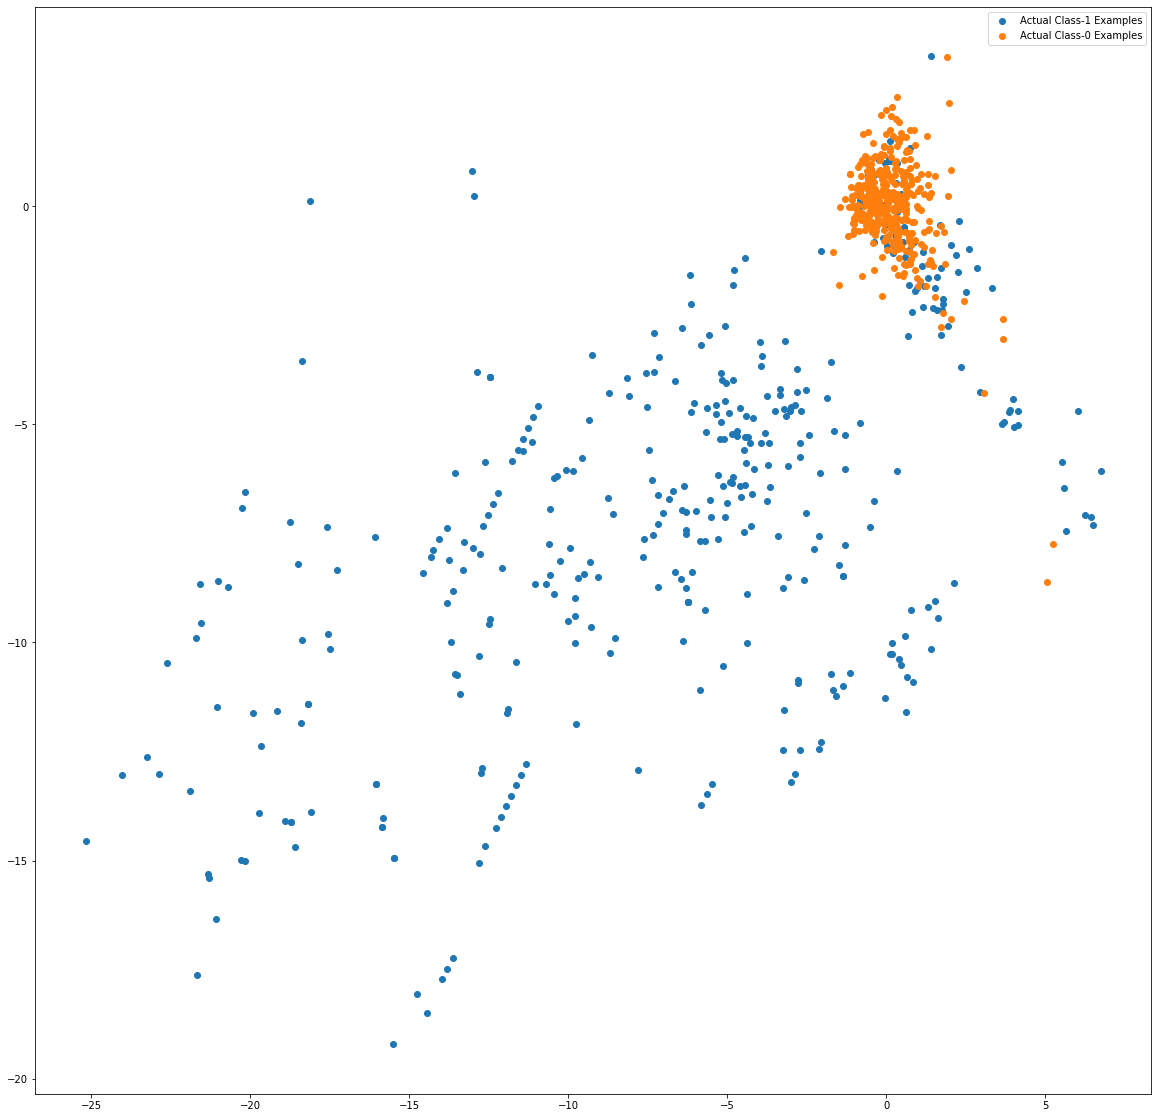

In [201]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### `b.) For the balanced Dataset`

Let us print the Best balanced Model to get the important Features:

In [202]:
# perform the best oversampling method on X_train & y_train
clf = XGBClassifier(min_child_weight =  1, max_depth =  15, learning_rate =  0.15, gamma= 0.4, colsample_bytree= 0.3)  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn,y_train_adasyn ) # fit on the balanced dataset
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [203]:
threshold = thresholds[np.argmax(tpr-fpr)]
print("Best Threshold",threshold)
y_pred = clf.predict(X_test)
y_class = list(map(lambda x: 1 if x > threshold else 0,y_pred_prob))
print("Test AUC : ",round(roc_auc_score(y_test,y_pred_prob),4))

Best Threshold 0.003948
Test AUC :  0.9843


Top var = 4
2nd Top var = 17
3rd Top var = 14


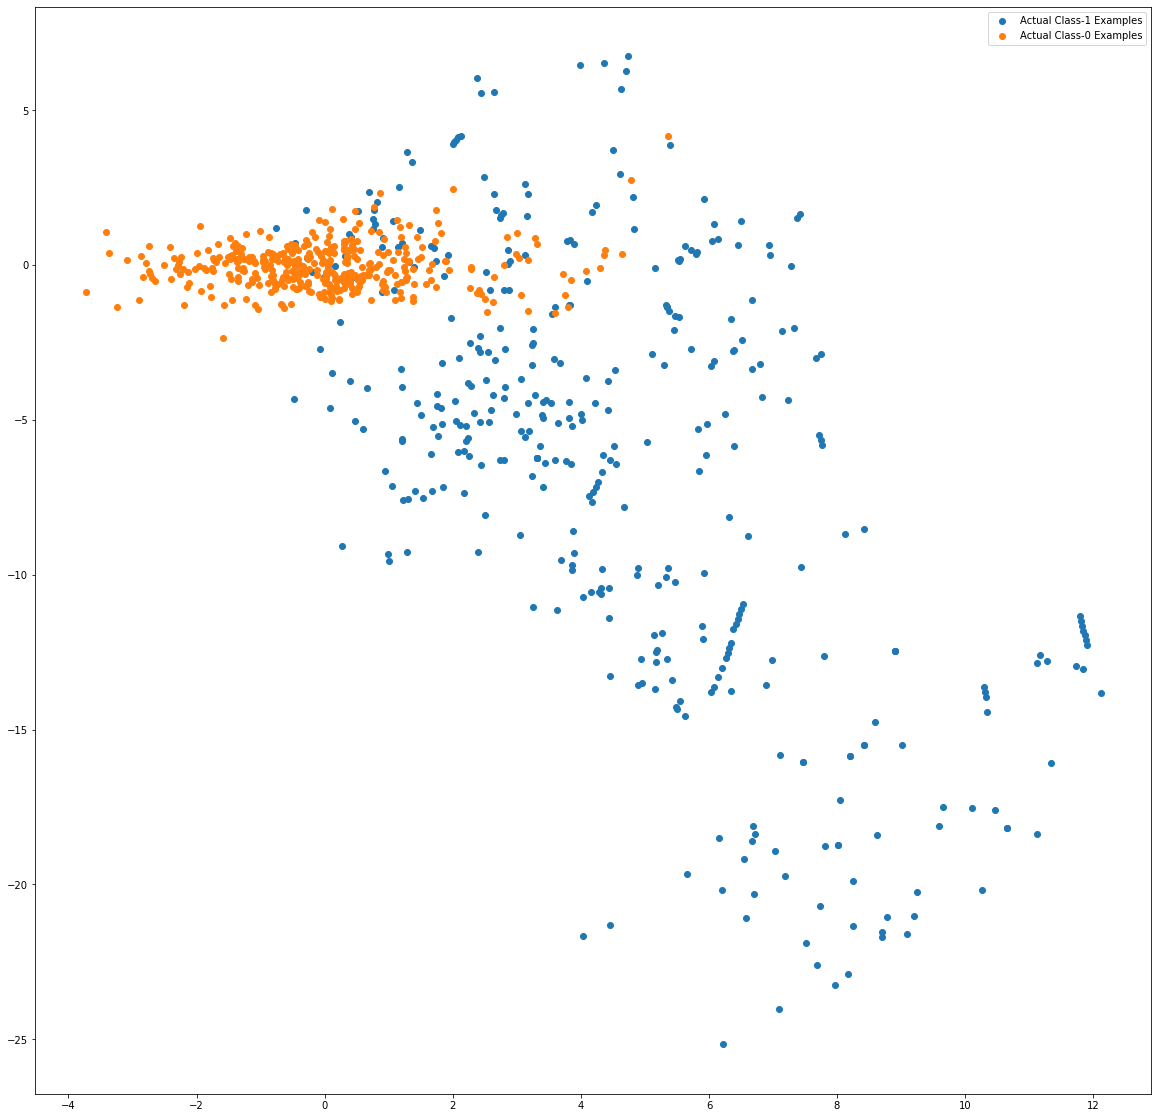

In [204]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()